In [21]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2:3].values

In [23]:
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1, 1)).ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
y_actual = sc_y.inverse_transform([y_test]).flatten()

In [24]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)

y_pred = sc_y.inverse_transform([regressor.predict(x_test)]).flatten()

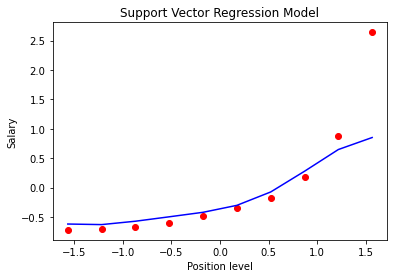

In [25]:
plot.scatter(x, y, color = 'red')
plot.plot(x, regressor.predict(x), color = 'blue')
plot.title('Support Vector Regression Model')
plot.xlabel('Position level')
plot.ylabel('Salary')
plot.show()